<div align="center">
<h1> 
Analytics and Application - WS2021/22 <br>
Master of Science WI / IS <br>
Faculty of Management, Economics, and Social Sciences <br>
Department of Information Systems for Sustainable Society University of Cologne </h1>
</div>
    
<hr>

<div align="center"> 
    <b>Instructor </b> Prof. Dr. Wolfgang Ketter <br>
    <b> TA </b> Nastaran Naseri
</div>

<hr>

<div align="center">
<h3> 
Team Assignment - Team 06 <br>
Data Miners CABIB <br>
Isabel Wittmann, Bastian Schneider, Andrej Kotsovolos, Björn Reibke & Carsten Stukenborg </h3>
</div>

<hr>

<div align="center">
<h5> Dataset Chicago 2019 </h5>
</div>

<hr>
    
<div align="center">
<h2> 1. Data Collection and Preparation </h2>
</div>

# 1. Data Collection and Preparation

The downloaded dataset of bike sharing rentals in Chicago 2019 is cleaned and prepared for descriptive analytics, clustering and predective analytics. Data cleaning includes handling missing and erroneous data but also introduced appropriate naming of columns and indices. 

The following steps are performed: 
- 1.1 Import libraries and datasets
- 1.2 Showing basic information of loaded datasets
- 1.3 Extract weather data from year 2019
- 1.4 Check null and NaN values in datasets
- 1.5 Check for duplicate values in datasets
- 1.6 Check for negative or non-contextual data
- 1.7 Prepare and merge bike rental data and weather data
- 1.8 Interpolation
- 1.9 Visualization of interpolation
- 1.10 Executing merge
- 1.11 Comparison between initial and cleaned data sets
- 1.12 Export of cleaned data as separate CSV file
- 1.13 Import of location data and execution of basic cleaning steps
- 1.14 Merge of ride- and location data


<h3>
1.1 Import Libraries and Datasets     
</h3>

In [2]:
# Import libaries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import statistics
from datetimerange import DateTimeRange

<b> datetime </b> <br>
We import datetime in order to handle the dates in the data set. The datetime module supplies classes for manipulating dates and times with focus efficient attribute extraction for output formatting and manipulation.

<b> statistics </b> <br>
The statistics module provides functions for calculating mathematical statistics of numeric (Real-valued) data.

<b> DateTimeRange </b> <br>
DateTimeRange is a Python library to handle a time range. e.g. check whether a time is within the time range, get the intersection of time ranges, truncating a time range, iterate through a time range, and so forth.

In [2]:
# Import both data sets - Chicago 2019 and weather data
# Parse_dates directly passes the respective attributes as dates and not as objects
divvy_bike_set = pd.read_csv("../data/chicago_2019.csv", parse_dates=["start_time", "end_time"])
weather_set = pd.read_csv("../data/weather_hourly_chicago.csv", parse_dates=["date_time"])

<h3>
1.2 Showing Basic Information of Loaded Datasets     
</h3>

In [3]:
# Show information name and datatype of each column of loaded dataset
divvy_bike_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818004 entries, 0 to 3818003
Data columns (total 8 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_time          datetime64[ns]
 1   end_time            datetime64[ns]
 2   start_station_id    int64         
 3   end_station_id      int64         
 4   start_station_name  object        
 5   end_station_name    object        
 6   bike_id             int64         
 7   user_type           object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 233.0+ MB


In [4]:
# Show information name and datatype of each column of loaded dataset
weather_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43788 non-null  datetime64[ns]
 1   max_temp   43788 non-null  float64       
 2   min_temp   43788 non-null  float64       
 3   precip     43790 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [5]:
# Show first rows of divvy bike set
divvy_bike_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber


In [6]:
# Show first rows of weather set
# Inspecting the head, you can see that there are values from 2015 --> We only need the weather data from 2019
weather_set.head()

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.7,-1.7,0.0
1,2015-01-02 02:00:00,-2.2,-2.2,0.0
2,2015-01-02 03:00:00,-2.8,-2.8,0.0
3,2015-01-02 04:00:00,-3.3,-3.3,0.0
4,2015-01-02 05:00:00,-4.4,-4.4,0.0


In [7]:
# Show characteristics of divvy bike set 
divvy_bike_set.describe()

,start_station_id,end_station_id,bike_id
count,3.818004e+06,3.818004e+06,3.818004e+06
mean,2.016659e+02,2.026363e+02,3.380252e+03
std,1.560798e+02,1.562388e+02,1.902511e+03
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.700000e+01,7.700000e+01,1.727000e+03
50%,1.740000e+02,1.740000e+02,3.451000e+03
75%,2.890000e+02,2.910000e+02,5.046000e+03
max,6.730000e+02,6.730000e+02,6.946000e+03


In [8]:
# Show characteristics of weather set
weather_set.describe()

,max_temp,min_temp,precip
count,43788.000000,43788.000000,43790.000000
mean,10.741208,10.672707,0.093811
std,11.540262,11.533530,0.291569
min,-30.600000,-30.600000,0.000000
25%,1.700000,1.700000,0.000000
50%,11.100000,11.100000,0.000000
75%,20.600000,20.600000,0.000000
max,36.100000,36.100000,1.000000


<h3>
1.3 Extract Weather Data from Year 2019  
</h3>

In [9]:
# Extract two reference points for interpolation (see section 1.8)
# Minimum reference point: 2018-12-31 23:00:00
min_ref = weather_set[weather_set.date_time == "2018-12-31 23:00:00"]
# Maximum refrence point: 2020-01-01 00:00:00
max_ref = weather_set[weather_set.date_time == "2020-01-01 00:00:00"]

In [10]:
# Only use weather data from the year 2019
weather_set["valid_date_2019"] = list(map(lambda x: x in DateTimeRange("2019-01-01 00:00:00", "2019-12-31 23:59:59"), weather_set["date_time"]))
weather_set = weather_set[weather_set["valid_date_2019"] == True]
weather_set = weather_set.drop("valid_date_2019", axis=1)

In [11]:
# The data set now only comprises data from 2019
weather_set["date_time"].min()

Timestamp('2019-01-01 00:00:00')

In [12]:
weather_set["date_time"].max()

Timestamp('2019-12-31 23:00:00')

<h3>
1.4 Check Null and NaN Values in Datasets  
</h3>

In [13]:
# Check for null values in the rows on the divvy bike set
len(divvy_bike_set) - len(divvy_bike_set.dropna(axis = 0))

0

In [14]:
# Check for null values in the rows on the weather set
len(weather_set) - len(weather_set.dropna(axis = 0))

0

In [15]:
# Check if there still are non given values in the weather set
for col in weather_set.columns:
    pct_missing = np.mean(weather_set[col].isnull())
    print('{} - {} %'.format(col, round(pct_missing*100)))

date_time - 0 %
max_temp - 0 %
min_temp - 0 %
precip - 0 %


In [16]:
# Check if there still are non given values in the weather set
for col in divvy_bike_set.columns:
    pct_missing = np.mean(divvy_bike_set[col].isnull())
    print('{} - {} %'.format(col, round(pct_missing*100)))

start_time - 0 %
end_time - 0 %
start_station_id - 0 %
end_station_id - 0 %
start_station_name - 0 %
end_station_name - 0 %
bike_id - 0 %
user_type - 0 %


<h3>
1.5 Check for Duplicate Values in Datasets   
</h3>

<b>First</b>, we are monitoring the bike set data

In [17]:
# Check for duplicate values on the divvy bike set
len(divvy_bike_set) - len(divvy_bike_set.drop_duplicates())

116

In [18]:
# Show the duplicates
divvy_bike_set[divvy_bike_set.duplicated(keep=False)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
1614650,2019-07-09 15:20:04,2019-07-09 15:25:14,282,241,Halsted St & Maxwell St,Morgan St & Polk St,2389,Subscriber
1614722,2019-07-09 15:09:11,2019-07-09 15:22:01,67,177,Sheffield Ave & Fullerton Ave,Theater on the Lake,6171,Subscriber
1614853,2019-07-09 15:09:11,2019-07-09 15:22:01,67,177,Sheffield Ave & Fullerton Ave,Theater on the Lake,6171,Subscriber
1615135,2019-07-09 15:20:04,2019-07-09 15:25:14,282,241,Halsted St & Maxwell St,Morgan St & Polk St,2389,Subscriber
1615661,2019-07-09 15:12:33,2019-07-09 15:31:44,454,520,Broadway & Granville Ave,Greenview Ave & Jarvis Ave,6424,Subscriber
...,...,...,...,...,...,...,...,...
1660668,2019-07-11 18:14:57,2019-07-11 18:37:07,181,324,LaSalle St & Illinois St,Stockton Dr & Wrightwood Ave,6232,Subscriber
1660679,2019-07-11 18:14:57,2019-07-11 18:37:07,181,324,LaSalle St & Illinois St,Stockton Dr & Wrightwood Ave,6232,Subscriber
1661752,2019-07-11 21:33:23,2019-07-11 21:36:58,268,268,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,824,Subscriber
1662080,2019-07-11 21:33:23,2019-07-11 21:36:58,268,268,Lake Shore Dr & North Blvd,Lake Shore Dr & North Blvd,824,Subscriber


In [19]:
# Drop duplicate entries
divvy_bike_set = divvy_bike_set.drop_duplicates() #default: keep="first"

In [20]:
# Check for duplicate entries with the same start time, end time and bike id which is an error in the data
len(divvy_bike_set) - len(divvy_bike_set.drop_duplicates(subset = ("start_time", "end_time", "bike_id")))

1

In [21]:
# Show the according entry
divvy_bike_set[divvy_bike_set.duplicated(subset = ("start_time", "end_time", "bike_id"), keep=False)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
1654406,2019-07-11 16:42:44,2019-07-11 17:03:21,76,76,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,1142,Customer
1654501,2019-07-11 16:42:44,2019-07-11 17:03:21,76,76,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,1142,Subscriber


In [22]:
# Drop it
divvy_bike_set = divvy_bike_set.drop_duplicates(subset = ("start_time", "end_time", "bike_id"))

In [23]:
# Check for duplicate entries with the same start time, end time, start station id and end station id
# Our assumption is that this pattern is highly unlikely occuring in real life
len(divvy_bike_set) - len(divvy_bike_set.drop_duplicates(subset = ("start_time", "end_time", "start_station_id", "end_station_id")))

3272

In [24]:
# Show them
divvy_bike_set[divvy_bike_set.duplicated(subset = ("start_time", "end_time", "start_station_id", "end_station_id"),keep=False)]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
440,2019-01-01 11:55:20,2019-01-01 12:24:44,25,232,Michigan Ave & Pearson St,Pine Grove Ave & Waveland Ave,6374,Subscriber
441,2019-01-01 11:55:20,2019-01-01 12:24:44,25,232,Michigan Ave & Pearson St,Pine Grove Ave & Waveland Ave,6433,Subscriber
515,2019-01-01 12:44:38,2019-01-01 12:50:10,57,59,Clinton St & Roosevelt Rd,Wabash Ave & Roosevelt Rd,3875,Subscriber
516,2019-01-01 12:44:38,2019-01-01 12:50:10,57,59,Clinton St & Roosevelt Rd,Wabash Ave & Roosevelt Rd,6118,Subscriber
609,2019-01-01 13:40:29,2019-01-01 13:50:07,166,93,Ashland Ave & Wrightwood Ave,Sheffield Ave & Willow St,2006,Subscriber
...,...,...,...,...,...,...,...,...
3795863,2019-12-25 20:41:50,2019-12-25 21:10:56,274,274,Racine Ave & 15th St,Racine Ave & 15th St,5199,Customer
3798239,2019-12-26 13:23:56,2019-12-26 13:31:19,320,346,Loomis St & Lexington St,Ada St & Washington Blvd,3409,Subscriber
3798240,2019-12-26 13:23:56,2019-12-26 13:31:19,320,346,Loomis St & Lexington St,Ada St & Washington Blvd,666,Subscriber
3806815,2019-12-28 12:13:33,2019-12-28 12:26:16,313,673,Lakeview Ave & Fullerton Pkwy,Lincoln Park Conservatory,1336,Customer


In [25]:
# Drop them
divvy_bike_set = divvy_bike_set.drop_duplicates(subset = ("start_time", "end_time", "start_station_id", "end_station_id"))

<b>Second</b>, we conclude by monitoring the weather data set.

In [26]:
# length of weather data set 
original_length = len(weather_set)
original_length

8752

In [27]:
# Check for duplicate values on the weather data set
len(weather_set) - len(weather_set.drop_duplicates())

147

In [28]:
# Show the duplicates
weather_set[weather_set.duplicated(keep=False)]

,date_time,max_temp,min_temp,precip
35066,2019-01-02 03:00:00,-3.3,-3.3,0.0
35067,2019-01-02 03:00:00,-3.3,-3.3,0.0
35085,2019-01-01 22:00:00,-3.3,-3.3,0.0
35086,2019-01-01 22:00:00,-3.3,-3.3,0.0
35089,2019-01-03 02:00:00,-2.2,-2.2,0.0
...,...,...,...,...
43448,2019-12-16 08:00:00,-4.4,-4.4,1.0
43644,2019-12-24 13:00:00,0.6,0.6,0.0
43645,2019-12-24 13:00:00,0.6,0.6,0.0
43741,2019-12-28 14:00:00,2.2,1.7,0.0


In [29]:
# Drop duplicate entries
weather_set = weather_set.drop_duplicates() # default: keep="first", keep first occurence

In [30]:
# Check duplicates on column date_time.
weather_set.sort_values(by=['date_time'])
weather_set[weather_set.duplicated(subset=['date_time'], keep=False)] 

,date_time,max_temp,min_temp,precip
35040,2019-01-01 00:00:00,2.8,2.2,1.0
35063,2019-01-01 00:00:00,2.8,2.8,1.0
35071,2019-01-01 08:00:00,0.6,0.6,0.0
35072,2019-01-01 08:00:00,0.6,0.0,1.0
35082,2019-01-01 19:00:00,-2.8,-2.8,0.0
...,...,...,...,...
43793,2019-12-30 18:00:00,-0.6,-0.6,0.0
43794,2019-12-30 18:00:00,-0.6,-1.1,0.0
43798,2019-12-30 23:00:00,-1.7,-1.7,1.0
43799,2019-12-30 23:00:00,-1.1,-1.7,1.0


There are still 451 duplicate entries for the date time column in the weather data set. The same date is described by two or more different temperature and/or precip entries (example 2019-01-01 00:00:00 has two different entries for min_temp). Here we do not know, which entry is valid. Therefore we decided to drop both entries (see argument "keep=False").  
Later on, we also show that some other entries for a specific hour are also missing.
As conclusion we decided to interpolate all missing and dropped entries. 

In [31]:
# Drop them
weather_set = weather_set.drop_duplicates(subset = ['date_time'], keep=False) # Drop all duplicates (keep=False)

<h3>
1.6 Check for Negative or Non-contextual Data    
</h3>

<h4>
Weather set  
</h4>

In [32]:
# Check if there are other values than 0 or 1 for precip --> Not the case
weather_set.groupby("precip").count()

,date_time,max_temp,min_temp
precip,,,
0.0,7107,7107,7107
1.0,596,596,596


Here, we are checking if there invalid temperature data. We defined it as invalid, 
if the maximum temperature is above 45°C or below 45°C.
As can be seen, that is not the case here.

In [33]:
weather_set["max_temp"].max()

34.4

In [34]:
weather_set["max_temp"].min()

-30.6

After checking for obvious discrepancies, we want to visually display the temperature data, aggregated by hour. 

In [35]:
# For hourly aggregation, a new column is needed that reflects the full hours of the measurement entry. 
weather_set["hour"] = weather_set["date_time"].dt.hour

In [36]:
# Save min and max values
max_temp_maxima = []
max_temp_minima = []
min_temp_maxima = []
min_temp_minima = []
def plotWeatherHourly(weather_set,temperature):

    # 12 plots for each months: 2 plots for each row
    nrows=6
    ncols=2
    
    # mounth counter
    month = 1
    
    # Create figure and axes
    plot_figure, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize= (30,60))
    
    #Loop through each subplot
    for row in range(0,nrows):
        for column in range(0,ncols):
            # Get single axe of subplot
            axe = axes[row][column]
                        
            # Reduce weather_set to month in question
            weather_month = weather_set[weather_set["date_time"].dt.month == month]
            # Calculate the mean temperature values for each hour for month
            weather_group = weather_month.groupby("hour").mean()
            
            # Create vector for x-axsis to represent the hours
            hours = np.arange(0,24,1)
              
            # plot
            axe.plot(hours, weather_group[temperature], label="Temperature curve")
            
            axe.xaxis.set_ticks(np.arange(0, 24, 1))

            
            # Reg curve
            polyReg = np.poly1d(np.polyfit(hours, weather_group[temperature], 4))
            x = np.arange(0, 24, 1)
            axe.plot(x, polyReg(x), label="Reg curve of temperature")
            
            # Find local max
            ymax = max(weather_group[temperature])
            xmax = weather_group[weather_group[temperature]==ymax].index.values[0]
            if temperature =="max_temp":
                max_temp_maxima.append(xmax+0.0)
            else: 
                min_temp_maxima.append(xmax+0.0)
            
            # Find local max
            ymin = min(weather_group[temperature])
            xmin = weather_group[weather_group[temperature]==ymin].index.values[0]
            if temperature =="max_temp":
                max_temp_minima.append(xmin+0.0)
            else: 
                min_temp_minima.append(xmin+0.0)
            
            # Mark local max
            axe.annotate('local max', xy=(xmax, ymax), xytext=(xmax-1, ymax-2),
                         arrowprops=dict(arrowstyle="->",facecolor='black'), size=14
                        )
            
            # Mark local min
            axe.annotate('local min', xy=(xmin, ymin), xytext=(xmin-1, ymin+1),
                         arrowprops=dict(arrowstyle="->",facecolor='black'), size=14
                        )

            # Label the y-axis and set a title
            axe.set_ylabel(temperature, fontsize=15)
            axe.set_xlabel("Hours", fontsize=15)
            title= "Mean hourly based temperature " + str(temperature) +" for month " + str(month)
            axe.set_title(title, fontsize=15)

            # Increase month counter
            month = month + 1
            axe.legend(prop={'size': 12})
            

    # Show plot
    plt.show()

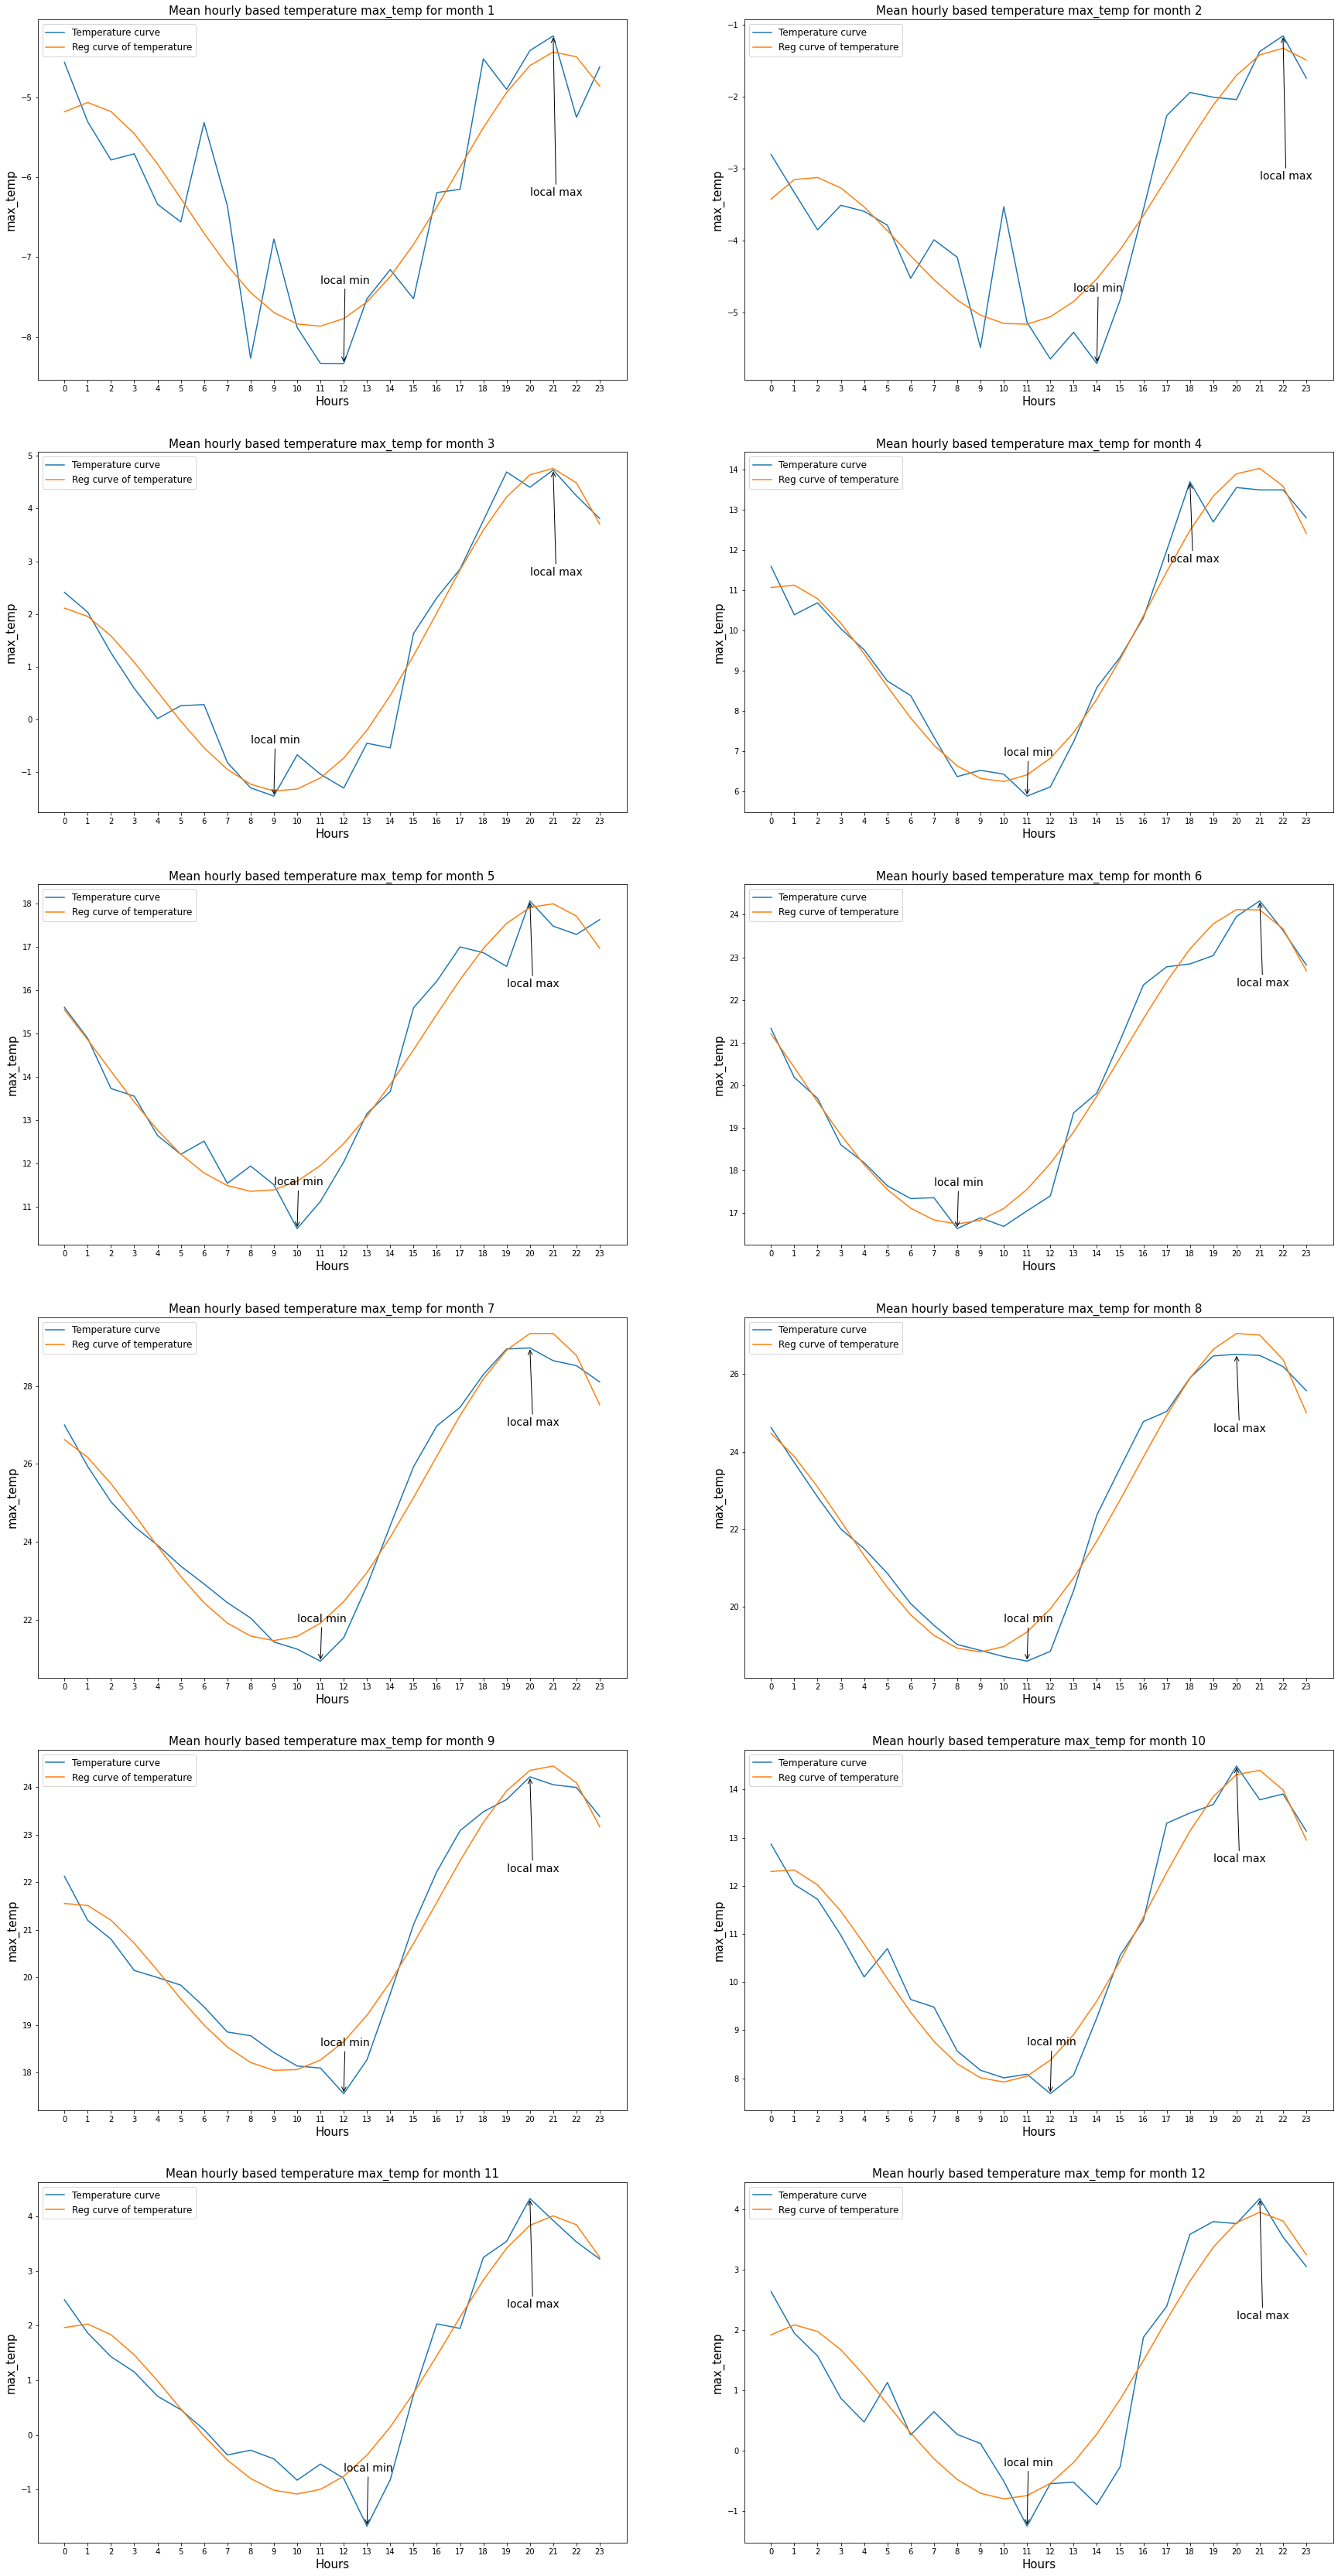

In [37]:
plotWeatherHourly(weather_set,"max_temp")

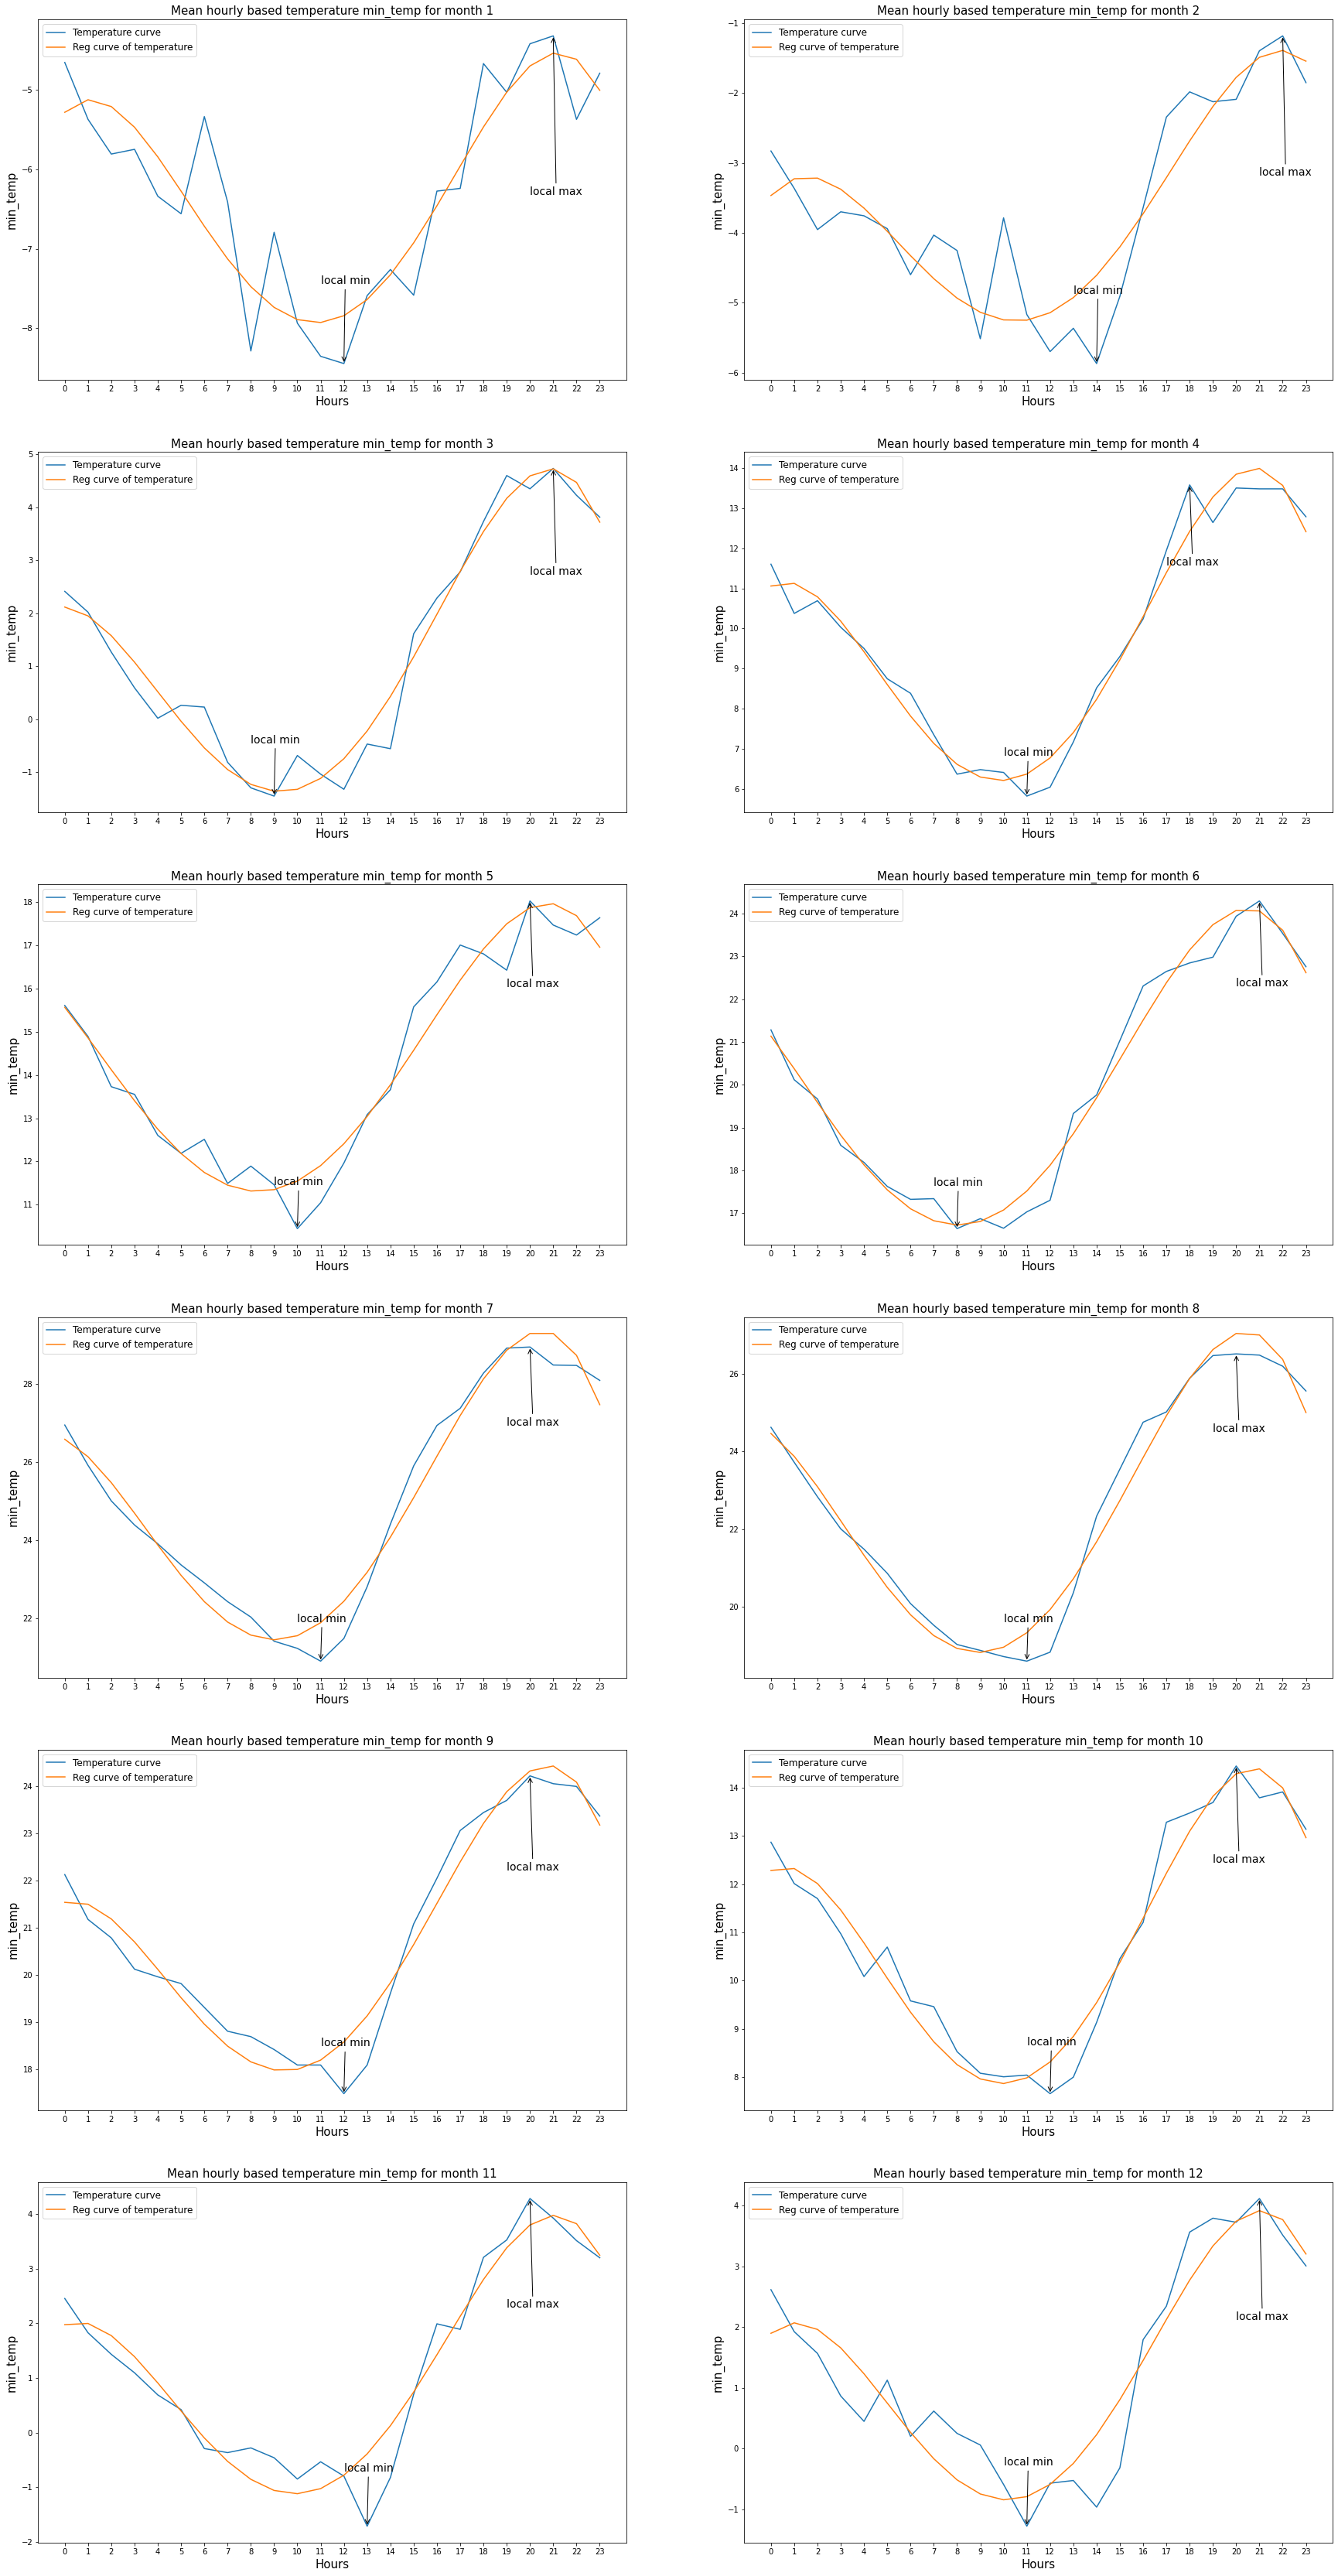

In [38]:
plotWeatherHourly(weather_set,"min_temp")

In [39]:
# Calculate the mean hour for the maximum and minimum temperature values 
max_temp_avg_hour_max  = statistics.mean(max_temp_maxima)
max_temp_avg_hourg_min = statistics.mean(max_temp_minima)
min_temp_avg_hour_max  = statistics.mean(min_temp_maxima)
min_temp_avg_hourg_min =statistics.mean(min_temp_minima)
print(
"The maximum value of the max_temp temperature values is on average at {} o'clock. \nThe minimum value of the max_temp temperature values is on average at {} o'clock. \nThe maximum value of the min_temp temperature values is on average at {} o'clock. \nThe minium value of the min_temp temperature values is on average at {} o'clock. \n"
.format(max_temp_avg_hour_max, max_temp_avg_hourg_min, min_temp_avg_hour_max, min_temp_avg_hourg_min)    
)

The maximum value of the max_temp temperature values is on average at 20.333333333333332 o'clock. 
The minimum value of the max_temp temperature values is on average at 11.166666666666666 o'clock. 
The maximum value of the min_temp temperature values is on average at 20.333333333333332 o'clock. 
The minium value of the min_temp temperature values is on average at 11.166666666666666 o'clock. 



<b> Anomalies in temperature data </b> <br>

The temperature curves presented above show an anomaly:<i> It seems that the data was shifted to the right by 5 or 6 hours.
</i>    
    
Looking at the temperature pattern of an average day, one would expect the temperature to be lowest in the morning between 5 a.m. and 7 a.m. and highest at noon between 2 p.m. and 4 p.m. These values are related to the number of hours of sunshine and position of the sun to the earth. In the morning the earth is strongly cooled down, because the sun did not shine the whole night. At noon the earth has warmed up again and the sun is at its relatively highest position to the earth.
<br>
However, the existing temperature data do not correspond to this course. The graphs, as well as the calculations above, clearly show that the average maximum temperature is reached at 20 o'clock in the evening and the average minimum temperature is reached at 11 a.m.
<br>
Our assumption that there is a shift also corresponds with comparative data from weatherspark.com (see https://de.weatherspark.com/h/d/14091/2019/7/15/Historisches-Wetter-am-Montag-15.-Juli-2019-in-Chicago-Illinois-Vereinigte-Staaten#Figures-Temperature ). The data in weatherspark.com shows the expected pattern: minimum temperature at 6 a.m. and maximum temperature at 3 p.m.
<br>
<br>
<b>Consequences of the annomalies: </b> <br>
The dates are shifted 5 hours to the left respectively calculated 5 hours back.<br>
The weather data on weatherspark.com usually shows a temperature minimum at 6 a.m. and a temperature maximum at 3 p.m. Based on our average values from above, this results in a shift value of 5 to get similiar values.

In [40]:
for i in range(0,len(weather_set)): 
    weather_set.date_time.iloc[i] = weather_set.date_time.iloc[i]  - datetime.timedelta(hours=5)
    
weather_set["hour"] = weather_set["date_time"].dt.hour
weather_set

C:\Users\B145\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date_time,max_temp,min_temp,precip,hour
35041,2018-12-31 20:00:00,2.2,1.1,1.0,20
35042,2018-12-31 22:00:00,1.1,1.1,1.0,22
35043,2018-12-31 23:00:00,1.1,1.1,1.0,23
35044,2019-01-01 00:00:00,1.1,1.1,1.0,0
35045,2019-01-01 01:00:00,1.1,1.1,0.0,1
...,...,...,...,...,...
43818,2019-12-31 14:00:00,-3.3,-3.3,0.0,14
43819,2019-12-31 15:00:00,-3.3,-3.3,0.0,15
43820,2019-12-31 16:00:00,-3.3,-3.3,0.0,16
43821,2019-12-31 17:00:00,-3.3,-3.3,0.0,17


The shift results in some datetime entries of the year 2018. We will drop these entries and interpolate the missing data later on. 

In [41]:
# Only consider data from 2019
weather_set = weather_set[weather_set["date_time"].dt.year == 2019]

In [42]:
# Check if there is data from 2018 
weather_set[weather_set["date_time"].dt.year == 2018]

,date_time,max_temp,min_temp,precip,hour


After the interpolation, the data will be plotted again, so the results of the shift are displayed (see 1.9). 

When comparing the graphs from above and the average calculations, it is noticeable that there is no high discrepancy between the max_temp and min_temp values. This will be examined in more detail in the following: 

In [43]:
counter = 0
for i in range(0,len(weather_set)): 
    if weather_set.iloc[i].max_temp == weather_set.iloc[i].min_temp: 
        counter += 1

perc = counter / len(weather_set)
perc

0.9518181818181818

In more than 95 percent of the data, the max_temp and min_temp entries are identical. It can thus be stated that a distinction between min_temp and max_temp will not lead to any significant differences in the further course of this work. Consequently, the min_temp column is no longer considered and can be deleted.  

In [44]:
weather_set = weather_set.drop("min_temp",axis=1) # were 1 represents columns
weather_set

,date_time,max_temp,precip,hour
35044,2019-01-01 00:00:00,1.1,1.0,0
35045,2019-01-01 01:00:00,1.1,0.0,1
35064,2019-01-01 20:00:00,-3.3,0.0,20
35065,2019-01-01 21:00:00,-3.3,0.0,21
35066,2019-01-01 22:00:00,-3.3,0.0,22
...,...,...,...,...
43818,2019-12-31 14:00:00,-3.3,0.0,14
43819,2019-12-31 15:00:00,-3.3,0.0,15
43820,2019-12-31 16:00:00,-3.3,0.0,16
43821,2019-12-31 17:00:00,-3.3,0.0,17


<h4>
Divvy bike set  
</h4>

Next, we are calculating the durations of each trip, to make further analysis on that.

In [45]:
# Calculate the duration of a trip
divvy_bike_set["duration_time"] = divvy_bike_set["end_time"] - divvy_bike_set["start_time"]

In [46]:
divvy_bike_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04


In [47]:
# Convert the duration in days into three columns: Duration in seconds, in minutes and in hours
divvy_bike_set["duration_sec"] = list(map(lambda y: y.total_seconds(), divvy_bike_set["duration_time"]))
divvy_bike_set["duration_min"] = list(map(lambda y: y.total_seconds()/60, divvy_bike_set["duration_time"]))
divvy_bike_set["duration_hour"] = list(map(lambda y: y.total_seconds()/3600, divvy_bike_set["duration_time"]))

In [48]:
divvy_bike_set.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,duration_min,duration_hour
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,390.0,6.500000,0.108333
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,441.0,7.350000,0.122500
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,829.0,13.816667,0.230278
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,1783.0,29.716667,0.495278
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,364.0,6.066667,0.101111


In [49]:
# Check for invalid time, i.e. negative duration of a ride and get their indexes
invalid_time_indexes = divvy_bike_set[divvy_bike_set["duration_sec"] <= 0].index
invalid_time_indexes

Int64Index([3498428, 3498433, 3498435, 3498436, 3498437, 3498439, 3498440,
            3498441, 3498442, 3498443, 3498445, 3498446, 3498447],
           dtype='int64')

In [50]:
# 13 negative values are present
len(invalid_time_indexes)

13

In [51]:
# Drop these negative values from the divvy bike data set
divvy_bike_set = divvy_bike_set.drop(index=invalid_time_indexes)

We consider trips lasting longer than 60 seconds to be valid trips. Here we follow the recommendations of Divvy. They state on their website (https://www.divvybikes.com/system-data) that they have already removed trips that last up to 60 seconds. These kind of short trips are considered as failures or a user checked a second time if the bike was really locked.

In [52]:
# Check if there are still entries which have a duration below 60 seconds
divvy_bike_set[divvy_bike_set["duration_sec"]<=60]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,duration_min,duration_hour


Next, we are checking how many trips have a **duration above 3 hours**. We assessed that one can buy a divvy day bike pass
which includes 3 hours of unlimited driving. However, these three hours do not need to be taken in one trip, but a user
can end a bike rent after 30 minutes and then can again rent a bike and drive 2,5 hours more.

As can be seen the amount of entries with a duration larger than 3 hours only accounts for 0,3% of the whole data size.
As a general rule of thumb outliers can take up about 5% of the whole data set.

That is why we decided to remove this data to be able to make fitting visualizations and predictions.

In [53]:
# Check if there are entries which have a duration above 3 hours
over_three_hours_index = divvy_bike_set[divvy_bike_set["duration_hour"] >= 3].index
percentage = len(over_three_hours_index)/len(divvy_bike_set)
percentage

0.003708381634571575

In [54]:
# Drop all entries above a three hour duration
divvy_bike_set = divvy_bike_set.drop(index=over_three_hours_index)

In [55]:
# Check for entries with the end time after 2019
end_after_2019_index = divvy_bike_set[divvy_bike_set["end_time"] >= datetime.datetime.strptime("2020-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")].index

In [56]:
# Search for entries with the end time after 2019
len(end_after_2019_index)

17

In [57]:
# Remove all rows with the end_time after 2019
divvy_bike_set = divvy_bike_set.drop(index=end_after_2019_index)

In [58]:
# Check if there are negative bike ids --> Not the case
divvy_bike_set[divvy_bike_set["bike_id"]< 0]

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,duration_min,duration_hour


In [59]:
# Check if there are other entries than "subscriber" and "customer" for the user_type --> Not the case
divvy_bike_set.groupby("user_type").count()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,duration_time,duration_sec,duration_min,duration_hour
user_type,,,,,,,,,,,
Customer,868325,868325,868325,868325,868325,868325,868325,868325,868325,868325,868325
Subscriber,2932114,2932114,2932114,2932114,2932114,2932114,2932114,2932114,2932114,2932114,2932114


In [60]:
# Check if all start station names always have the same id

# First, count unique start_station_names
unique_start_length = len(divvy_bike_set["start_station_name"].unique())

# Then, count the unique tuples of (start_station_name, start_station_id)
unique_tuple_startname_id = list(divvy_bike_set.groupby(['start_station_name', 'start_station_id']).groups)
unique_start_tuple_length = len(unique_tuple_startname_id)

# Compare them
unique_start_length == unique_start_tuple_length

# True means that a start_station_name always has the same id as another entry

True

In [61]:
# Check if all end station names always have the same id

# First, count unique end_station_names
unique_end_length = len(divvy_bike_set["end_station_name"].unique())

# Then, count the unique tuples of (end_station_name, end_station_id)
unique_tuple_endname_id = list(divvy_bike_set.groupby(['end_station_name', 'end_station_id']).groups)
unique_end_tuple_length = len(unique_tuple_endname_id)

# Compare them
unique_end_length == unique_end_tuple_length

# True means that a start_station_end always has the same id as another entry

True

In [62]:
# Add columnn describing if the start_time and end_time of the trip is a weekday
divvy_bike_set["weekday_start"] = list(map(lambda z: (z.weekday() != 5) and (z.weekday != 6), divvy_bike_set["start_time"]))

<h3>
1.7 Prepare Bike Rental Data and Weather Data for Interpolation and Merge 
</h3>

In [63]:
# Add a colum date_time which is the start time rounded to the next hour, to then later merge the two data sets on it
divvy_bike_set["full_hour_start"] = divvy_bike_set["start_time"].dt.round('H')
divvy_bike_set["full_hour_end"] = divvy_bike_set["end_time"].dt.round('H')

In [64]:
divvy_bike_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,duration_min,duration_hour,weekday_start,full_hour_start,full_hour_end
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,390.0,6.500000,0.108333,True,2019-01-01,2019-01-01 00:00:00
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,441.0,7.350000,0.122500,True,2019-01-01,2019-01-01 00:00:00
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,829.0,13.816667,0.230278,True,2019-01-01,2019-01-01 00:00:00
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,1783.0,29.716667,0.495278,True,2019-01-01,2019-01-01 01:00:00
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,364.0,6.066667,0.101111,True,2019-01-01,2019-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3817989,2019-12-31 23:46:19,2019-12-31 23:53:51,641,259,Central Park Ave & Bloomingdale Ave,California Ave & Francis Pl (Temp),41,Subscriber,0 days 00:07:32,452.0,7.533333,0.125556,True,2020-01-01,2020-01-01 00:00:00
3817994,2019-12-31 23:50:05,2019-12-31 23:53:33,624,81,Dearborn St & Van Buren St,Daley Center Plaza,1720,Subscriber,0 days 00:03:28,208.0,3.466667,0.057778,True,2020-01-01,2020-01-01 00:00:00
3817995,2019-12-31 23:50:19,2019-12-31 23:55:37,255,3,Indiana Ave & Roosevelt Rd,Shedd Aquarium,4561,Subscriber,0 days 00:05:18,318.0,5.300000,0.088333,True,2020-01-01,2020-01-01 00:00:00
3817996,2019-12-31 23:51:19,2019-12-31 23:55:33,638,134,Clinton St & Jackson Blvd,Peoria St & Jackson Blvd,5654,Subscriber,0 days 00:04:14,254.0,4.233333,0.070556,True,2020-01-01,2020-01-01 00:00:00


In [65]:
# Check for rounded end times after the end of 2019
invalid_time_indexes_2020 = divvy_bike_set[divvy_bike_set["full_hour_end"] == datetime.datetime.strptime("2020-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")].index

In [66]:
len(invalid_time_indexes_2020)

32

In [67]:
# Drop them
divvy_bike_set = divvy_bike_set.drop(index=invalid_time_indexes_2020)

In [68]:
print("Oiginal lenght of weather dataset: ", original_length)
print("Actual length after dropping entries: ",len(weather_set))
z = 24*365
print("The number of entries should actually be according the formula 24*365 = ", z)
print("Number of missing rows: ", (z- len(weather_set) ) )
print("Number of missing rows in precent: ", (1- (len(weather_set)/z)))

Oiginal lenght of weather dataset:  8752
Actual length after dropping entries:  7700
The number of entries should actually be according the formula 24*365 =  8760
Number of missing rows:  1060
Number of missing rows in precent:  0.12100456621004563


<b>Missing entries in weather set </b> <br>
The above calculations show, that the original weather set (before dropping) contained some missing entries. The number of missing entries was even increased after dropping duplicate values. 
<br>
However, there should be 24*365 = 8760 entries. Therefore, rows for some hours are missing.
With this in mind, the merge of the weather and divvy bike data would cause a loss of trip data on these specific hours (see calculation in cell above). That is why we decided to do an interpolation of the missing weather data.

In [69]:
# Rename the column date_time to full_hour_start to be able to merge on this column with method pd.merge()
weather_set = weather_set.rename(columns={'date_time' : 'full_hour_start'})
# Show renamed column
weather_set.head(1)

,full_hour_start,max_temp,precip,hour
35044,2019-01-01,1.1,1.0,0


In [70]:
# Check loss on merge
# Note: The method pd.merge() returns the merged dataframe. Since the return value is not saved, the final merge is not executed yet. 
#       The method pd.merge() without saving the return value is used to ilustrate the potential data loss. 
pct_loss = (len(divvy_bike_set) - len(pd.merge(divvy_bike_set, weather_set, on='full_hour_start')))/len(divvy_bike_set)
pct_loss

0.08801925688485471

<h3>
1.8 Interpolation  
</h3>
<br>
As interpolation methods we use the linear approach for the temperature values and the nearest neighbor method for the precip values. 
<br>
<br>
<b> Linear Interpolation </b> <br>
Linear Interpolation calculate an estimated point, assumeing to lie on the line joining the nearest points to the left and right (1). Linear interpolation, as the name also implies, assumes a linear dependence between the values to be interpolated. 
Our weather data is based on hourly entries and only describes max and min temperatues values. As we do not have additional weather data, we assume a linear dependence between two consecutive weather data entries. More precisely, this assumption leads to the following effect: Given, for example, temperature values for 12 pm with 2 degrees and 2pm with 6 degrees. These sample data express a positive linear effect, so this is reflected in the interpolated value of 4 degree at 1pm. However, we cannot say with certainty if there was a positive increase in temperature between 12pm and 2pm. However, we assume this positive increase to be most likely because as the time increases during the day, the temperature also increases (positive linear effect) and decreases during the night/evening (negative linear effect). For simplicity and lack of data, we do not consider the slope of the temperature rise, which varies throughout the day. Considering the mentioned aspects and assumptions, a linear interpolation is evaluated as suitable.  
<br>
(Source (1): Bayen A. M., Siauw T. (2015). An Introduction to MATLAB® Programming and Numerical Methods for Engineers. Chapter 14: Interpolation. *Academic Press*. ISBN 978-0-12-420228-3)
    
<b> Nearest Neighbor </b> <br>
The right choice for a suitable interpolation method concerning the precip values requires to take into account the binary data format: 0 implies no rain and 1 implies rain. Therefore the interpolated values has also to be binary. Most interpolation methods like linear, quadratic and many more return floating values and are consequently not appropriate. <br>
The nearest neighbor method ensures that only values are returned that are present in the dataset. We assume here, that it is most likley that the nearest point to a value, which indicates rain, also indicates a rain value. 

In [71]:
# Interpolation of missing weather data
 
# Sort weather data
weather_set = weather_set.sort_values(by="full_hour_start")

# Copy weather data in second dataframe 
weather_set_interpol = weather_set.copy()

# Add column interpol to mark interpolated values as True
weather_set_interpol["interpol"] = list(map(lambda x: "N", weather_set_interpol["max_temp"]))

# Transpose weather_set_interpol to be able to insert rows (as columns in transposed dataframe)
weather_set_interpol_T = weather_set_interpol.T

# Iterate through all hours of a whole year
z = 365*24
# datetime(year, month, day, hour, minute, second, microsecond)
init_date = datetime.datetime(2019, 1, 1, 0, 0, 0, 0)
for i in range(0,z):
    # Calculate current date
    current_date = init_date + datetime.timedelta(hours=i)
    
    # Check if current date is contained in weather_set
    if len(weather_set[weather_set.full_hour_start == current_date]) == 0: 
        # Debug statement
        # print("Date {} is missing".format(current_date))
        
        # Insert entry as column with index -1 at position 0 with allowing duplicate indices
        weather_set_interpol_T.insert(0,-1,[current_date,None,None,None, "Y"],True)


# Insert reference point for interpolation methods as last and first entry. Otherwise the last and first cells will not be interpolated. 
weather_set_interpol_T.insert(0,-1,[min_ref.date_time.iloc[0],min_ref.max_temp.iloc[0],min_ref.precip.iloc[0],None, "N"],True)
weather_set_interpol_T.insert(0,-1,[max_ref.date_time.iloc[0],max_ref.max_temp.iloc[0],max_ref.precip.iloc[0],None, "N"],True)

# Transpose the weather_set_interpol_T dataframe to receive original strucutre                
weather_set_interpol = weather_set_interpol_T.T
                                                
# Sort dataframe once again and reindex the new inserted values to eleminate '-1' indices
weather_set_interpol = weather_set_interpol.sort_values(by="full_hour_start")
weather_set_interpol = weather_set_interpol.reset_index(drop=True)

# Change None to np.nan, so interpolate() recognizes cells
weather_set_interpol.replace({None: np.nan}, inplace = True)

# Interpolate
weather_set_interpol["max_temp"] = weather_set_interpol["max_temp"].interpolate(method ='linear', limit_direction ='both')
#weather_set_interpol["min_temp"] = weather_set_interpol["min_temp"].interpolate(method ='linear', limit_direction ='both')
weather_set_interpol["precip"] = weather_set_interpol["precip"].interpolate(method ='nearest')

# Drop reference points
weather_set_interpol.drop(weather_set_interpol.head(1).index,inplace=True) # drop first n rows
weather_set_interpol.drop(weather_set_interpol.tail(1).index,inplace=True) # drop last n rows

# Convert "Y" and "N" to boolean values
weather_set_interpol.loc[weather_set_interpol.interpol == "Y", 'interpol'] = True
weather_set_interpol.loc[weather_set_interpol.interpol == "N", 'interpol'] = False

# Update column hour to remove NaN values for interpolated rows
weather_set_interpol["hour"] = weather_set_interpol["full_hour_start"].dt.hour

C:\Users\B145\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3377: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


In [72]:
len(weather_set_interpol)

8760

In [73]:
weather_set_interpol

,full_hour_start,max_temp,precip,hour,interpol
1,2019-01-01 00:00:00,1.10,1.0,0,False
2,2019-01-01 01:00:00,1.10,0.0,1,False
3,2019-01-01 02:00:00,1.10,0.0,2,False
4,2019-01-01 03:00:00,0.55,0.0,3,True
5,2019-01-01 04:00:00,0.00,0.0,4,False
...,...,...,...,...,...
8756,2019-12-31 19:00:00,-2.70,0.0,19,True
8757,2019-12-31 20:00:00,-2.60,0.0,20,True
8758,2019-12-31 21:00:00,-2.50,0.0,21,True
8759,2019-12-31 22:00:00,-2.40,0.0,22,True


<h3>
1.9 Visualization of Interpolation
</h3>

The following section visualizes the effect of the interpolation on the weather data and is used for visual control.
We plot temperature values on a yearly and quarterly aggregation level. The additional quarterly level is used to better read the individual interpolated values.  
All plots show reasonable interpolated values without outliners. The interpolation is considered successful. 
<br>
Furthermore, the temperature data is presented on an hourly basis so that the shift made in section 1.6 can also be checked. 

<b> Yearly - Max temperature </b>

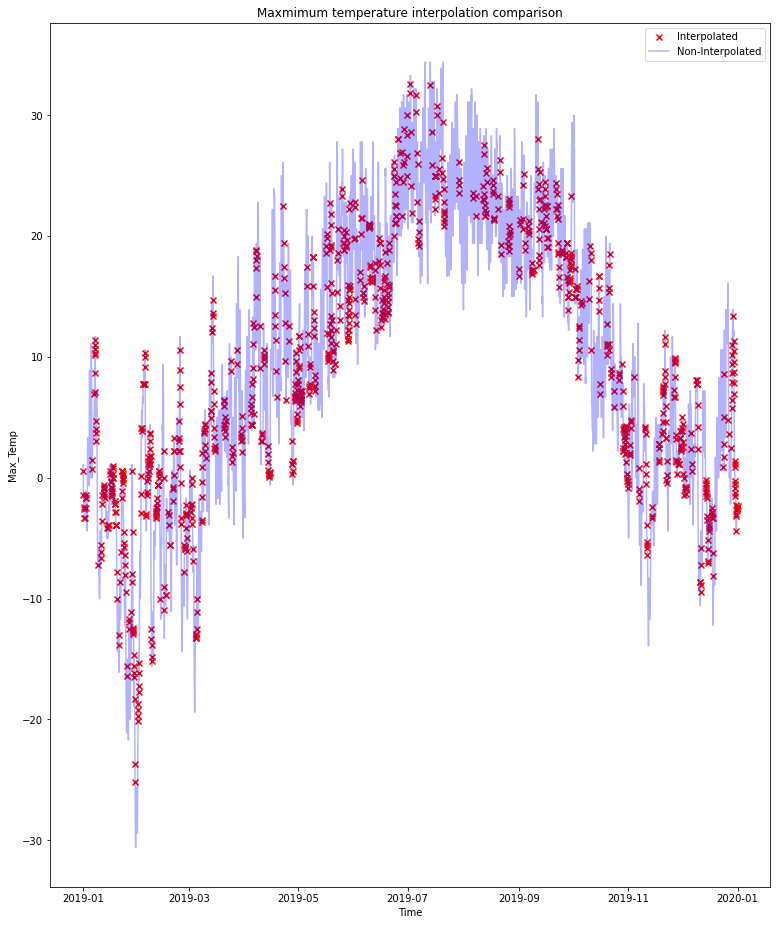

In [74]:
#Plot the maxtemp split by interpolated and non-interpolated values in order to check wether the interpolated
#values are reasonable
ws = weather_set_interpol
fig_1 = plt.figure(figsize = (10,12))
ax1 = fig_1.add_axes([0,0,1,1])
ax1.scatter(ws[ws["interpol"] == True]["full_hour_start"], ws[ws["interpol"] == True]["max_temp"], marker = "x", color = "red", label = "Interpolated")
ax1.plot(ws[ws["interpol"] == False]["full_hour_start"], ws[ws["interpol"] == False]["max_temp"], color = "blue", alpha = 0.3, label = "Non-Interpolated")
ax1.set_xlabel("Time")
ax1.set_ylabel("Max_Temp")
ax1.set_title("Maxmimum temperature interpolation comparison")
ax1.legend(loc = 0)
plt.show()

<b> Quarterly - Max temperature </b>

In [75]:
#Add the Quarter
ws["Quarter"] = list(map(lambda x: x.quarter, ws["full_hour_start"]))

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


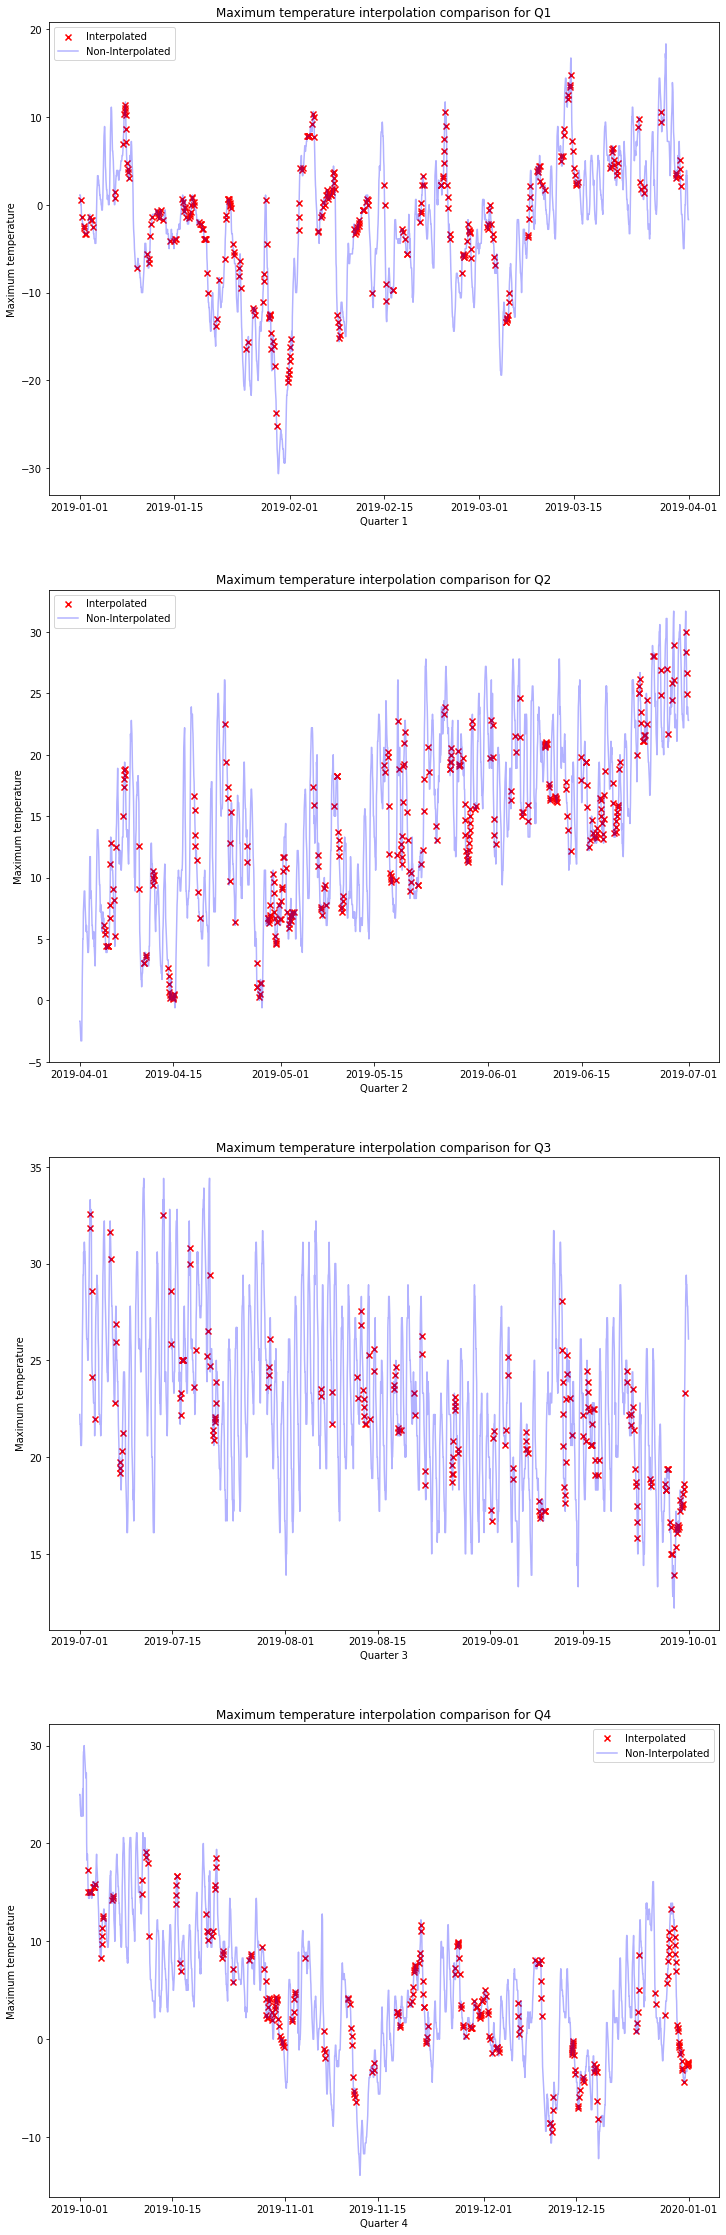

In [76]:
# Plot the max temp for Quarter 1, 2, 3 and 4, divided by interpolated and non-interpolated
# 1 subplots for each row
nrows=4
ncols=1

# Create figure and axes
figure, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize= (12,40))
print(axes)

# 1 
ax1 = axes[0]

ws_q1 = ws[ws["Quarter"] == 1]
ax1.scatter(ws_q1[ws_q1["interpol"] == True]["full_hour_start"], ws_q1[ws_q1["interpol"] == True]["max_temp"], marker = "x", color = "red", label = "Interpolated")
ax1.plot(ws_q1[ws_q1["interpol"] == False]["full_hour_start"], ws_q1[ws_q1["interpol"] == False]["max_temp"], color = "blue", alpha = 0.3, label = "Non-Interpolated")
ax1.set_xlabel("Quarter 1")
ax1.set_ylabel("Maximum temperature")
ax1.set_title("Maximum temperature interpolation comparison for Q1")
ax1.legend(loc = 0)

# 2 
ax2 = axes[1]

ws_q2 = ws[ws["Quarter"] == 2]
ax2.scatter(ws_q2[ws_q2["interpol"] == True]["full_hour_start"], ws_q2[ws_q2["interpol"] == True]["max_temp"], marker = "x", color = "red", label = "Interpolated")
ax2.plot(ws_q2[ws_q2["interpol"] == False]["full_hour_start"], ws_q2[ws_q2["interpol"] == False]["max_temp"], color = "blue", alpha = 0.3, label = "Non-Interpolated")
ax2.set_xlabel("Quarter 2")
ax2.set_ylabel("Maximum temperature")
ax2.set_title("Maximum temperature interpolation comparison for Q2")
ax2.legend(loc = 0)

# 3 
ax3 = axes[2]

ws_q3 = ws[ws["Quarter"] == 3]
ax3.scatter(ws_q3[ws_q3["interpol"] == True]["full_hour_start"], ws_q3[ws_q3["interpol"] == True]["max_temp"], marker = "x", color = "red", label = "Interpolated")
ax3.plot(ws_q3[ws_q3["interpol"] == False]["full_hour_start"], ws_q3[ws_q3["interpol"] == False]["max_temp"], color = "blue", alpha = 0.3, label = "Non-Interpolated")
ax3.set_xlabel("Quarter 3")
ax3.set_ylabel("Maximum temperature")
ax3.set_title("Maximum temperature interpolation comparison for Q3")
ax1.legend(loc = 0)

# 3 
ax4 = axes[3]

ws_q4 = ws[ws["Quarter"] == 4]
ax4.scatter(ws_q4[ws_q4["interpol"] == True]["full_hour_start"], ws_q4[ws_q4["interpol"] == True]["max_temp"], marker = "x", color = "red", label = "Interpolated")
ax4.plot(ws_q4[ws_q4["interpol"] == False]["full_hour_start"], ws_q4[ws_q4["interpol"] == False]["max_temp"], color = "blue", alpha = 0.3, label = "Non-Interpolated")
ax4.set_xlabel("Quarter 4")
ax4.set_ylabel("Maximum temperature")
ax4.set_title("Maximum temperature interpolation comparison for Q4")
ax4.legend(loc = 0)

plt.show()

<b> Hourly (Mean) - Max temperature </b> <br>
After interpolation and left shift of 5 hours, the temperature data curves seem reasonable.

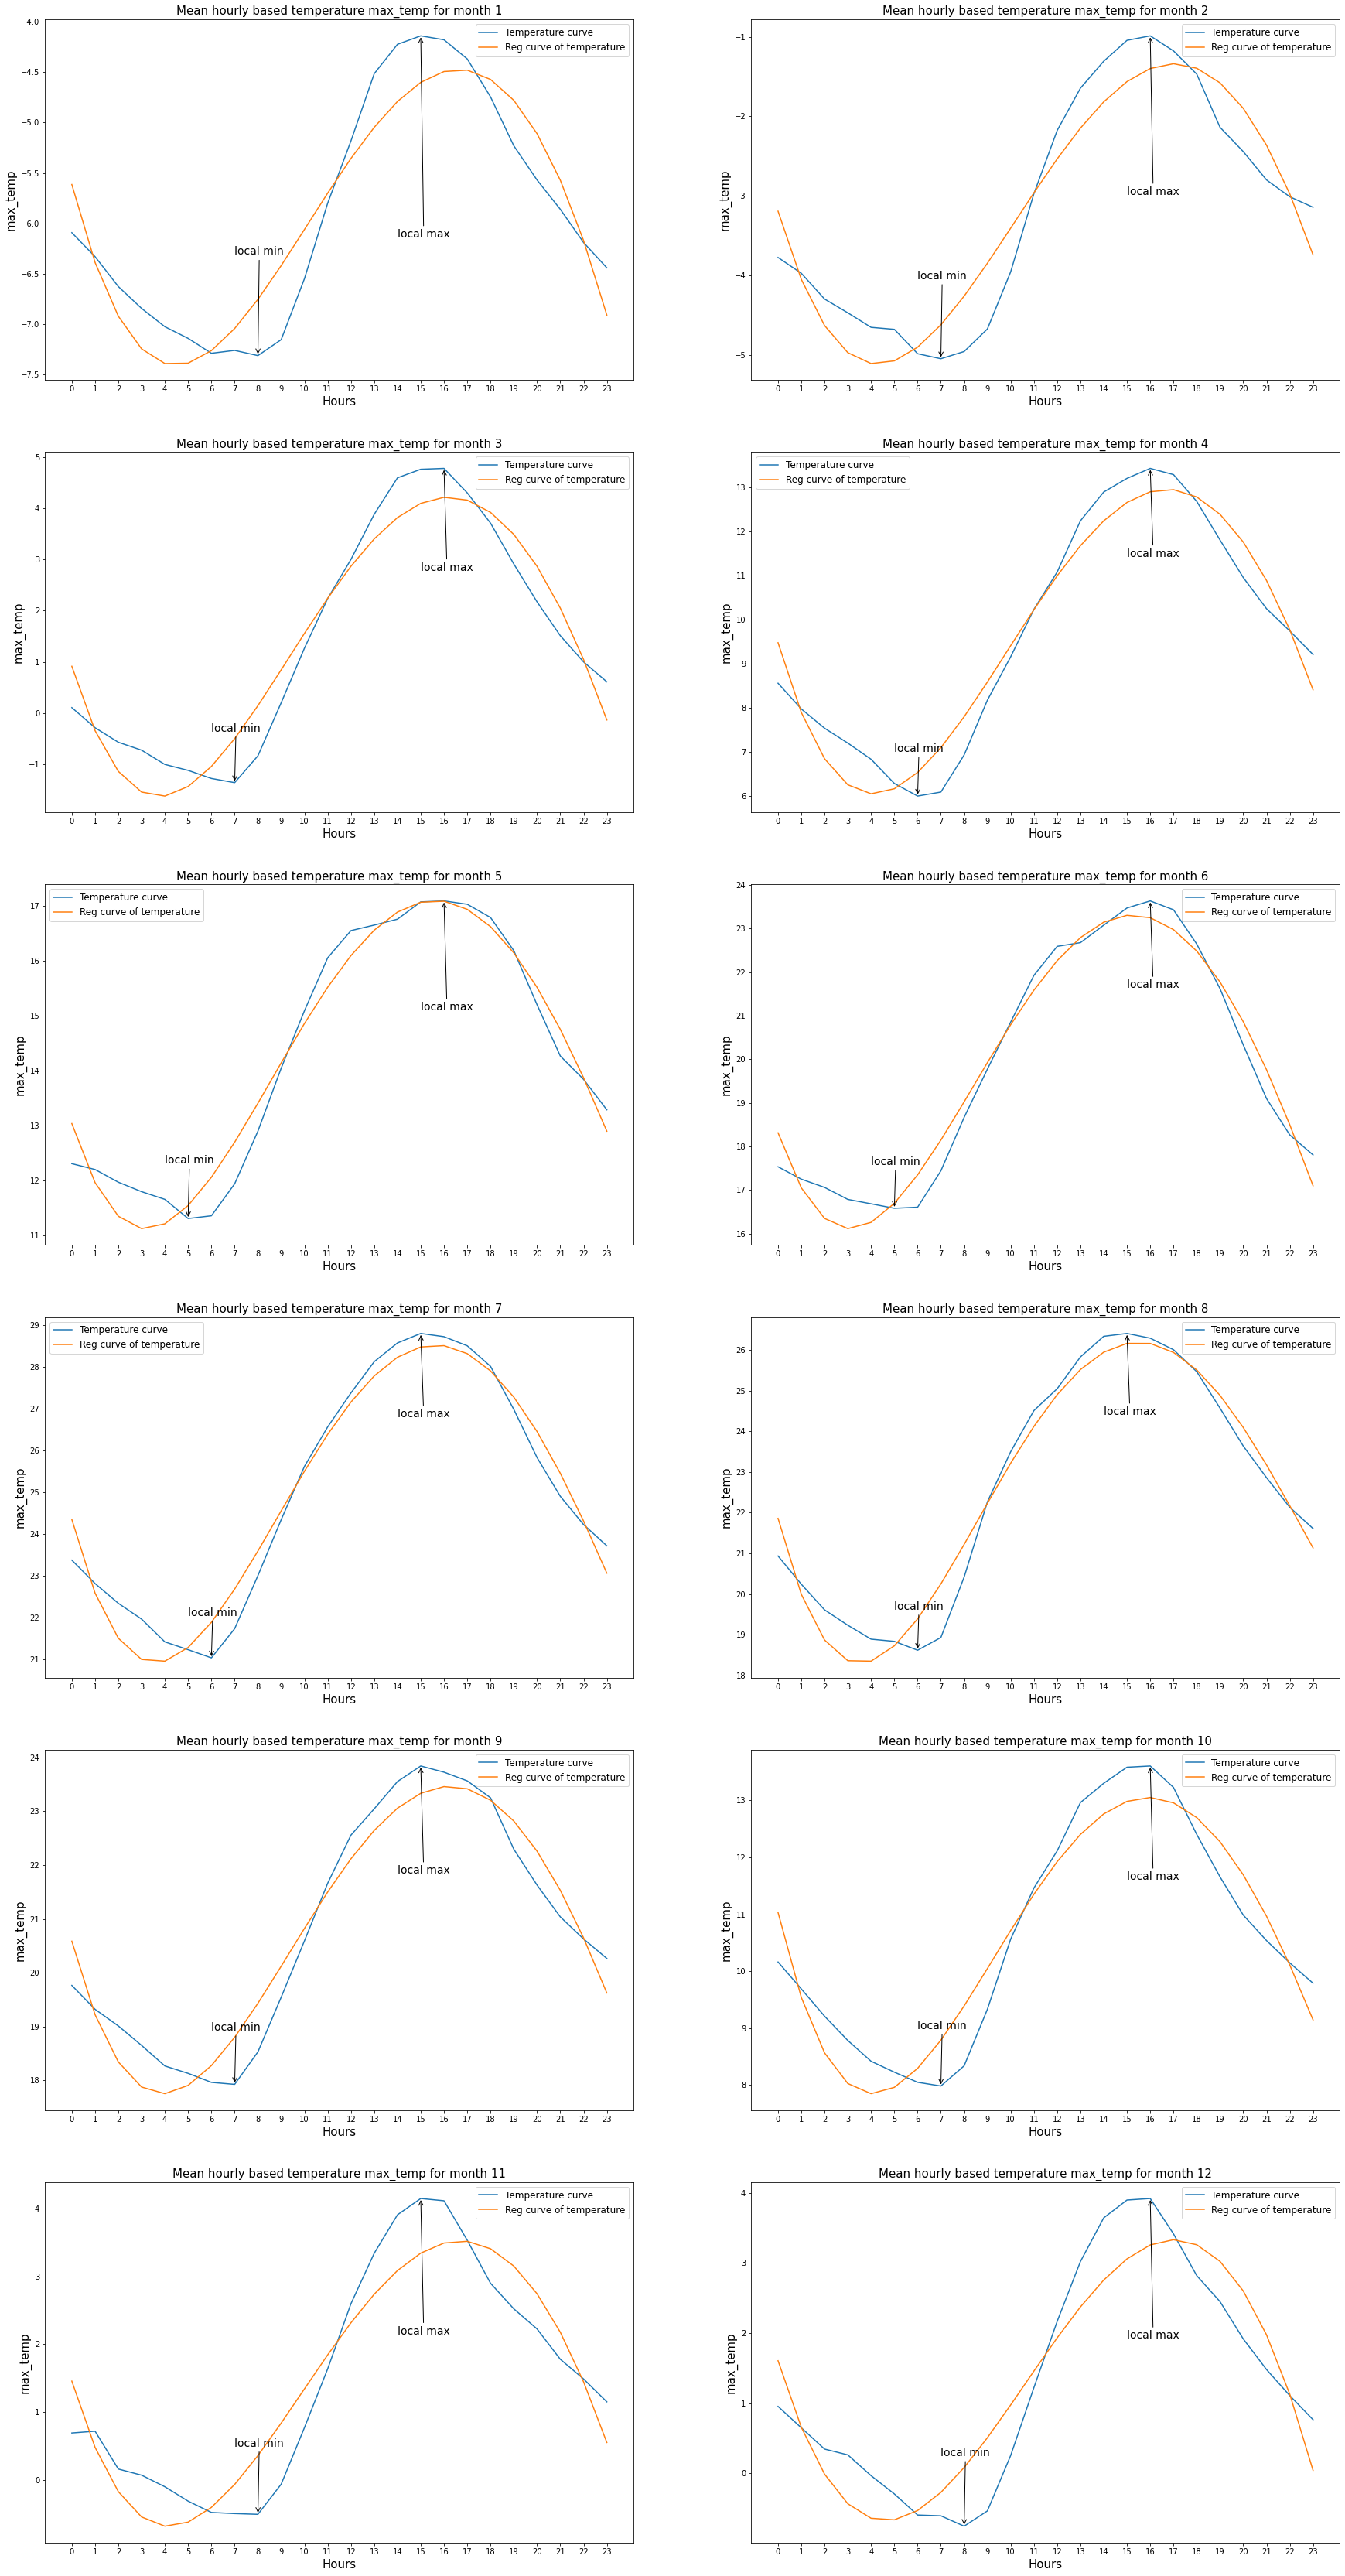

In [77]:
ws = ws.rename(columns={'full_hour_start' : 'date_time'})
plotWeatherHourly(ws,"max_temp")

<h3> 1.10 Executing Merge  </h3>

In [78]:
# Rename columns for merge
weather_set_interpol = weather_set_interpol.rename(columns={'date_time' : 'full_hour_start'})

# Check if merge lead to no data loss 
b = (len(divvy_bike_set) - len(pd.merge(divvy_bike_set, weather_set_interpol, on='full_hour_start')))/len(divvy_bike_set)
# If b = 0, there is no data loss. 
print(b)

0.0


In [79]:
# Merge the two data sets on the full_hour_start attribute
divvy_bike_weather_set = pd.merge(divvy_bike_set, weather_set_interpol, on='full_hour_start')
divvy_bike_weather_set

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,duration_min,duration_hour,weekday_start,full_hour_start,full_hour_end,max_temp,precip,hour,interpol,Quarter
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,390.0,6.500000,0.108333,True,2019-01-01 00:00:00,2019-01-01 00:00:00,1.1,1.0,0,False,1
1,2019-01-01 00:08:13,2019-01-01 00:15:34,44,624,State St & Randolph St,Dearborn St & Van Buren St (*),4386,Subscriber,0 days 00:07:21,441.0,7.350000,0.122500,True,2019-01-01 00:00:00,2019-01-01 00:00:00,1.1,1.0,0,False,1
2,2019-01-01 00:13:23,2019-01-01 00:27:12,15,644,Racine Ave & 18th St,Western Ave & Fillmore St (*),1524,Subscriber,0 days 00:13:49,829.0,13.816667,0.230278,True,2019-01-01 00:00:00,2019-01-01 00:00:00,1.1,1.0,0,False,1
3,2019-01-01 00:13:45,2019-01-01 00:43:28,123,176,California Ave & Milwaukee Ave,Clark St & Elm St,252,Subscriber,0 days 00:29:43,1783.0,29.716667,0.495278,True,2019-01-01 00:00:00,2019-01-01 01:00:00,1.1,1.0,0,False,1
4,2019-01-01 00:14:52,2019-01-01 00:20:56,173,35,Mies van der Rohe Way & Chicago Ave,Streeter Dr & Grand Ave,1170,Subscriber,0 days 00:06:04,364.0,6.066667,0.101111,True,2019-01-01 00:00:00,2019-01-01 00:00:00,1.1,1.0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800402,2019-12-31 23:12:04,2019-12-31 23:14:31,194,44,Wabash Ave & Wacker Pl,State St & Randolph St,2276,Subscriber,0 days 00:02:27,147.0,2.450000,0.040833,True,2019-12-31 23:00:00,2019-12-31 23:00:00,-2.3,0.0,23,True,4
3800403,2019-12-31 23:13:02,2019-12-31 23:16:46,507,123,Humboldt Blvd & Armitage Ave,California Ave & Milwaukee Ave,6301,Subscriber,0 days 00:03:44,224.0,3.733333,0.062222,True,2019-12-31 23:00:00,2019-12-31 23:00:00,-2.3,0.0,23,True,4
3800404,2019-12-31 23:17:55,2019-12-31 23:25:05,44,192,State St & Randolph St,Canal St & Adams St,2276,Subscriber,0 days 00:07:10,430.0,7.166667,0.119444,True,2019-12-31 23:00:00,2019-12-31 23:00:00,-2.3,0.0,23,True,4
3800405,2019-12-31 23:19:27,2019-12-31 23:29:42,256,229,Broadway & Sheridan Rd,Southport Ave & Roscoe St,4681,Subscriber,0 days 00:10:15,615.0,10.250000,0.170833,True,2019-12-31 23:00:00,2019-12-31 23:00:00,-2.3,0.0,23,True,4


<h3>
1.11 Comparison between Initial and Cleaned Data Sets
</h3>

In the following we compare the original divvy bike set with the cleaned divvy bike set and determine the overall dataloss. We do not take the weather set into account here, since we have shown in section 1.10, that the merge between divvy bike set and weather set did not result in any data loss. The reason for this result in section 1.10 is the interpolation performed in the previous sections. <br>
The next cell shows, that the overall dataloss is below one percentage point and is therefore classified as very acceptable. 

In [80]:
# Import both initial data sets before cleaning
divvy_bike_set_initial = pd.read_csv("../data/chicago_2019.csv", parse_dates=["start_time", "end_time"])

# Calculation
loss_abs = len(divvy_bike_set_initial) - len(divvy_bike_weather_set)
loss_perc = (1 - (len(divvy_bike_weather_set)/len(divvy_bike_set_initial)))*100

# Output
print("The cleaning process results in a data loss of {} entries or {} % expressed as a percentage.".format(loss_abs, loss_perc))

The cleaning process results in a data loss of 17597 entries or 0.46089527407514597 % expressed as a percentage.


<h3>
1.12 Export of Cleaned Data as Separate CSV File
</h3>

In [81]:
divvy_bike_weather_set.to_csv("../data/bike_weather_clean.csv",index=False)

In [82]:
#Check if no data was lost
check_data = pd.read_csv("../data/bike_weather_clean.csv")
len(check_data) - len(divvy_bike_weather_set)

0

In [83]:
weather_set_interpol.to_csv("../data/weather_clean_interpol.csv",index=False)

In [84]:
#Check if no data was lost
check_data2 = pd.read_csv("../data/weather_clean_interpol.csv")
len(check_data2) - len(weather_set_interpol)

0

<h3>
1.13 Import Location Data and Perform Basic Cleaning Steps
</h3>

The basic cleaning steps that have been applied for the ride data and that are applicable to the location data are performed here. Thus, we check whether null-values exist and whether duplicates are existent. However, no anomalies could be detected, thus we conclude that the location dataset is already clean. 
That the geographic distribution is reasonable can be seen in the descriptive analytics part, since all stations are reasonably scattered throughout Chicago and no outliers exist.
Bear in mind that although new stations have been added to the divvy system since 2019, it is no issue to obtain the location data from 2021, as new stations are indexed incrementally: Thus, no changes in terms of the ID assignment are made in terms of the "old" stations from 2019. Hence, we can use them without any further adjustment.

In [5]:
#Read in location data
#Reduce the stations to those which are active (i.e., in service)
locations = pd.read_csv("./../data/Divvy_Bicycle_Stations-2.csv")
locations = locations[locations["Status"] == "In Service"]
locations.head(5)

,ID,Station Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
0,373,Kedzie Ave & Chicago Ave,11,11,In Service,41.895465,-87.706128,"(41.89546530305, -87.7061278837)"
1,186,Ogden Ave & Race Ave,15,15,In Service,41.891795,-87.658751,"(41.891795, -87.658751)"
2,102,Stony Island Ave & 67th St,11,11,In Service,41.773458,-87.585340,"(41.77345849948, -87.5853397391)"
3,438,Central Park Ave & Ogden Ave,15,15,In Service,41.854064,-87.715117,"(41.854063503874464, -87.71511733531952)"
4,656,Damen Ave & Walnut (Lake) St,15,15,In Service,41.885951,-87.677009,"(41.885951, -87.677009)"


In [4]:
#Check for null values
print(len(locations) - len(locations.dropna()))

0


In [6]:
#Check for duplicate values
len(locations) - len(locations.drop_duplicates())

0

In [8]:
# Check for duplicate entries with the same Station Name
len(locations) - len(locations.drop_duplicates(subset = ("Station Name")))

0

In [9]:
# Check for duplicate entries with the same ID
len(locations) - len(locations.drop_duplicates(subset = ("ID")))

0

In [10]:
# Check for duplicate entries with the same Location data
len(locations) - len(locations.drop_duplicates(subset = ("Latitude", "Longitude")))

0

<h3>
1.14 Merge Ride- and Location Data
</h3>

After having checked that the location data is in an apropriate condition, we will merge the data with the ride-data. Oftentimes, we will nevertheless use the "pure" ride-data for analysis that is not dependant on locational data, because as you can see down below, the merge leads to a loss of around 24000 entries and to keep as much data as possible, we use the merged dataset (cwl) only when it is necessary.

In [85]:
#create DF to merge on start station id
locations_start = locations.rename(columns={'ID': 'start_station_id'})

#merge city weather location data on start station 
cwl = pd.merge(divvy_bike_weather_set, locations_start, on='start_station_id')

#Rename accordingly
cwl = cwl.rename(columns={'Latitude': 'Start_Latitude', 'Longitude': 'Start_Longitude'})


In [86]:
#Do the same as above, now with end IDs
locations_end = locations.rename(columns={'ID': 'end_station_id'})
locations_end = locations_end[["end_station_id", "Latitude", "Longitude"]]
cwl = pd.merge(cwl, locations_end, on='end_station_id')
cwl = cwl.rename(columns={'Latitude': 'End_Latitude', 'Longitude': 'End_Longitude'})
cwl.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_time,duration_sec,...,Quarter,Station Name,Total Docks,Docks in Service,Status,Start_Latitude,Start_Longitude,Location,End_Latitude,End_Longitude
0,2019-01-01 00:04:37,2019-01-01 00:11:07,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,2167,Subscriber,0 days 00:06:30,390.0,...,1,Wabash Ave & Grand Ave,31,31,In Service,41.891466,-87.626761,"(41.891466, -87.626761)",41.891578,-87.648384
1,2019-01-01 17:11:21,2019-01-01 18:18:35,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,3335,Subscriber,0 days 01:07:14,4034.0,...,1,Wabash Ave & Grand Ave,31,31,In Service,41.891466,-87.626761,"(41.891466, -87.626761)",41.891578,-87.648384
2,2019-01-03 15:55:41,2019-01-03 16:04:47,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,1156,Subscriber,0 days 00:09:06,546.0,...,1,Wabash Ave & Grand Ave,31,31,In Service,41.891466,-87.626761,"(41.891466, -87.626761)",41.891578,-87.648384
3,2019-01-03 16:20:43,2019-01-03 16:29:15,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,6110,Subscriber,0 days 00:08:32,512.0,...,1,Wabash Ave & Grand Ave,31,31,In Service,41.891466,-87.626761,"(41.891466, -87.626761)",41.891578,-87.648384
4,2019-01-04 06:27:21,2019-01-04 06:36:31,199,84,Wabash Ave & Grand Ave,Milwaukee Ave & Grand Ave,1013,Subscriber,0 days 00:09:10,550.0,...,1,Wabash Ave & Grand Ave,31,31,In Service,41.891466,-87.626761,"(41.891466, -87.626761)",41.891578,-87.648384


In [87]:
#Compare cwl length and city_weather length
len(divvy_bike_weather_set) - len(cwl)

24266

In [88]:
#Export this dataset aswell
cwl.to_csv("./../data/bike_weather_location_clean.csv",index=False)